# Lecture 4: Ordinary differential equation extensions

This notebook presents some extensions of material handled in lectures. It presents 

- A general method for non-homogeneous second-order ordinary differential equations; and
- The formulation of the differential equation for an elastic rod in one dimension via an integral approach.

We present an extension to what was covered in the lecture, namely the *variation of parameters method* for non-homogeneous equations.

# Method of undetermined coefficients

In the previous lecture, we covered the solution of non-homogeneous second-order differential equations. Although not explicitly stated, the method we used is known as *method of undetermined coefficients*. It relied on computing a solution to the homogeneous problem, and then having a suitable 'guess' for for the particular solution $y_{P}$.

But what if we do not know what $y_{P}$ should look like? In this case we can use the *variation of parameters* method.

# Variation of parameters method

We wish to find a solution to the problem

$$
\frac{d^{2}y}{dx^{2}} + p(x) \frac{dy}{dx} + q(x) y = f(x)
$$

By linearity, if $y_{P}$ is a solution to the above equation and $y_{CF}$ is a solution to the homogeneous equation,

$$
\frac{d^{2}y}{dx^{2}} + p(x) \frac{dy}{dx} + q(x) y = 0
$$

then the general solution is $y = y_{CF} + y_{P}$. 

For the case of constant coefficients, we know how to find the solution to the homogeneous problem, which is most cases is of the form

$$
y_{CF} = \underbrace{A_{1} e^{\lambda_{1} x}}_{y_{1}} + \underbrace{A_{2} e^{\lambda_{2} x}}_{y_{2}} 
$$

where $\lambda$ are the roots of $\lambda + p\lambda + q$.


Consider a particular solution $y_{P}$ of the form 

$$
y_{P} = v_{1}(x) y_{1} + v_{2}(x)y_{2}
$$

with the objective of finding the functions $v_{1}$ and $v_{2}$. We will insist of the constraint

$$
\frac{d v_{1}}{dx} y_{1} + \frac{d v_{2}}{dx} y_{2} = 0.
$$

Computing derivatives of $y_{P}$:

$$
\begin{align}
\frac{d y_{P}}{d x} &= v_{1} \frac{d y_{1}}{dx} + v_{2} \frac{d y_{2}}{dx}
\\
\frac{d^{2} y_{P}}{d x^{2}} &= \frac{d v_{1}}{dx} \frac{d y_{1}}{dx} + \frac{d v_{2}}{dx} \frac{d y_{2}}{dx} +
v_{1} \frac{d^{2} y_{1}}{dx^{2}} + v_{2} \frac{d^{2} y_{2}}{dx^{2}}
\end{align}
$$

Inserting the expressions for $y_{P}$ is its derivatives into the original equations (keeping in mind that $y_{1}$ and $y_{2}$ are solutions to the homogeneous problem), we find

$$
\frac{d v_{1}}{dx} \frac{d y_{1}}{dx} + \frac{d v_{2}}{dx} \frac{d y_{2}}{dx} = f(x)
$$

Combining the above equations with the conditon $v_{1}^{\prime} y_{1} + v_{2}^{\prime} y_{2} = 0$,

$$
\begin{align}
\frac{d v_{1}}{dx} &= -\frac{y_{2} f(x)}{W(x)}
\\
\frac{d v_{2}}{dx} &= \frac{y_{1} f(x)}{W(x)}
\end{align}
$$

where $W(x) = y_{1} y^{\prime}_{2} - y^{\prime}_{1} y_{2}$ is known as the *Wronskian*. Integrating both sides of the above equations,

$$
\begin{align}
v_{1} &= -\int \frac{y_{2} f(x)}{W(x)} dx
\\
v_{2} &= \int \frac{y_{1} f(x)}{W(x)} dx
\end{align}
$$

## Solving a given non-homogeneous equation symbolically

We now solve and ODE symbolically with a RHS side $f(x)$ of unknown form. We first import SymPy:

In [1]:
from sympy import *
init_printing()
from IPython.display import display

We first solve the homogeneous equation:

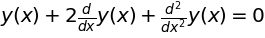

In [2]:
x = Symbol("x")
y = Function("y")
f = Function("f")
eqn = Eq(Derivative(y(x), x, x) + 2*Derivative(y(x), x) + y(x), 0)
display(eqn)
dsolve(eqn)

Now solve the non-homogeneous case for some $f(x)$:

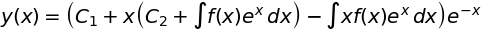

In [3]:
eqn = Eq(Derivative(y(x), x, x) + 2*Derivative(y(x), x) + y(x), f(x))
dsolve(eqn)

Note the integrand involving the product of $f(x)$ and terms from solution to the homogeneous problem, as expected from the variation of parameters method. 

# From balance laws to differential equations

It is common in science and engineering to derive differential equations from integral balance laws. The example of an elastic one-dimensional rod was covered in Lecture 4 (but it not in the printed lecture notes). That example repeated and expanded here.

Before presenting the example, we consider a theorem that we will use in the derivation.

## Localisation theorem

For a continuous function $\phi(x)$ on $\Omega$ statisfies

$$
\int_{B} \phi \, dx = 0 \quad \forall B \subset \Omega
$$

then 

$$
\phi(x) = 0 \quad \forall x \in \Omega.
$$

*Proof:*
The proof is by contradiction. Assume at some point $x_{0}$ that $\phi(x_{0}) = \delta > 0$. Since $\phi$ is continuous, there is a neighborhood $D \in \Omega$ around $x_{0}$ on which $\phi > 0$. On $D$, $\int_{D} \phi \, dx > 0$, which contradicts the first part of the theorem.

Note that the notation '$\forall B \subset \Omega$' means all subdomains of $\Omega$.

## An elastic rod in one dimension

An elastic rod in one dimension can transmit forces along its axis only (there is not shear or bending - it is not a beam). The normal force in the rod is $N$, and by definition $h = N n_{x}$, where $h$ is a force and $n_{x}$ is the outward unit normal vector. We assume the the normal force in the rod is smooth, i.e. it is continuous as its first derivative.

Consider the below bar with forces acting at the ends and a distributed load $f$ (force per unit length) acting along the rod.

![Alt text](1D_bar.svg)

Summing the forces acting on the rod,

$$
\int_{0}^{L} f \, dx + h_{L} + h_{0} = 0.
$$

Replacing $h$ by $N n_{x}$ (in one dimension $n_{x} = \pm 1$),

$$
\int_{0}^{L} f \, dx + N_{L} - N_{0} = 0.
$$

We can convert the $N_{L} - N_{0}$ term to an integral from $0$ to $L$:

$$
\int_{0}^{L} f \, dx + \int_{0}^{L} \frac{dN}{dx} \, dx = 0.
$$

Since $f$ and $dN$/dx are continuous, from the localisation theorem implies that

$$
\frac{dN}{dx} + f = 0.
$$

This is the equilibrium equation. For an elastic bar, the normal force in terms of deformation is given by Hooke's law:

$$
N = EA\frac{du}{dx},
$$

where $E$ is Young's modulus, $A(x)$ is the cross-sectional area of the rod, $u$ is the displacement and $du/dx$ is the strain.  Inserting the expression for $N$ into the equilibrium equation:

$$
\frac{d}{dx}\left(EA \frac{du}{dx}\right) + f = 0.
$$

This is a second-order differential equation, with $u$ being the dependent variable.